In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memnaggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum/Praktikum3"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [4]:
# Ganti sesuai lokasi file kamu
path = "/content/gdrive/MyDrive/Praktikum/Praktikum3/Data/day.csv"

df = pd.read_csv(path)
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Info data
print("=== INFO DATA ===")
df.info()


=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Statistik deskriptif
print("\n=== DESKRIPSI DATA ===")
print(df.describe())


=== DESKRIPSI DATA ===
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std

In [8]:
# Cek apakah ada nilai kosong
print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())



Jumlah missing value tiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
X = df[['temp']]   # Variabel independen
y = df['cnt']      # Variabel dependen (target)

# Bagi data jadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== HASIL EVALUASI MODEL ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


=== HASIL EVALUASI MODEL ===
Mean Absolute Error (MAE): 1291.97
Mean Squared Error (MSE): 2391051.89
R² Score: 0.4037


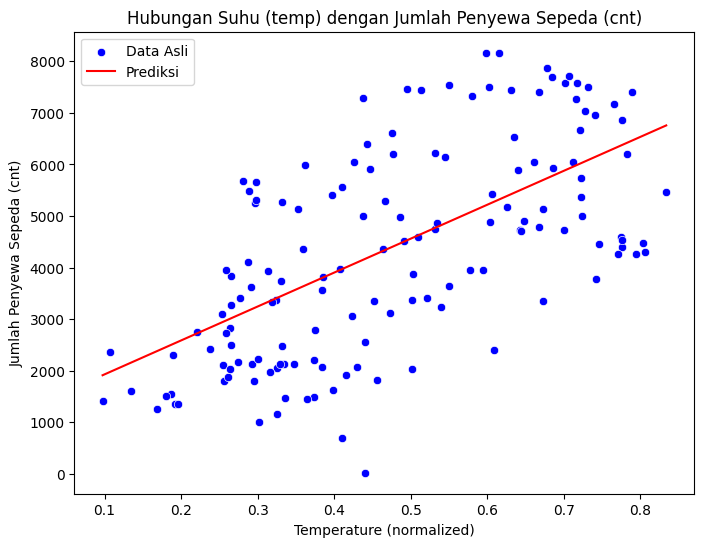

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['temp'], y=y_test, color='blue', label='Data Asli')
sns.lineplot(x=X_test['temp'], y=y_pred, color='red', label='Prediksi')
plt.title('Hubungan Suhu (temp) dengan Jumlah Penyewa Sepeda (cnt)')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Jumlah Penyewa Sepeda (cnt)')
plt.legend()
plt.show()


In [16]:
# Tambahkan konstanta untuk model OLS
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()

# Tampilkan hasil ringkasan OLS
print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           2.81e-81
Time:                        15:30:55   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537      0.0